# Machinge Learning With Python


## Module 2: Decision Trees

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(path)
my_data

Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
label_encoder = LabelEncoder()
my_data['Sex'] = label_encoder.fit_transform(my_data['Sex'])
my_data['BP'] = label_encoder.fit_transform(my_data['BP'])
my_data['Cholesterol'] = label_encoder.fit_transform(my_data['Cholesterol'])
my_data

Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   0            0   25.355  drugY
1     47    1   1            0   13.093  drugC
2     47    1   1            0   10.114  drugC
3     28    0   2            0    7.798  drugX
4     61    0   1            0   18.043  drugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            0   11.567  drugC
196   16    1   1            0   12.006  drugC
197   52    1   2            0    9.894  drugX
198   23    1   2            1   14.020  drugX
199   40    0   1            1   11.349  drugX

[200 rows x 6 columns]

In [ ]:
my_data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
custom_map = {'drugA': 0, 'drugB': 1, 'drugC': 2, 'drugX': 3, 'drugY': 4}
my_data['Drug'] = my_data['Drug'].map(custom_map)
my_data

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1            0   12.006     2
197   52    1   2            0    9.894     3
198   23    1   2            1   14.020     3
199   40    0   1            1   11.349     3

[200 rows x 6 columns]

In [ ]:
my_data.corr()['Drug']

Age           -0.004828
Sex           -0.098573
BP             0.372868
Cholesterol    0.055629
Na_to_K        0.589120
Drug           1.000000
Name: Drug, dtype: float64

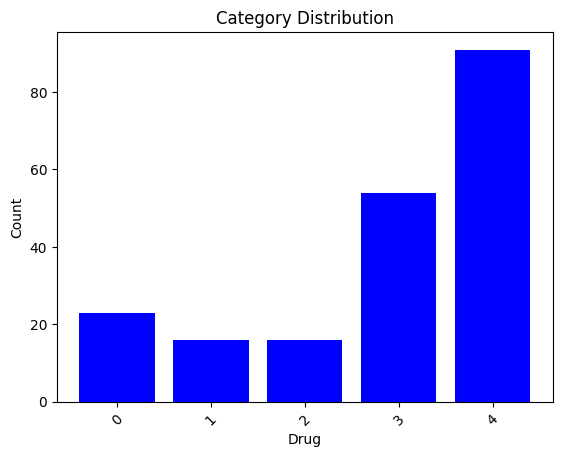

In [ ]:
category_counts = my_data['Drug'].value_counts()

# Plot the count plot
plt.bar(category_counts.index, category_counts.values, color='blue')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

In [ ]:
y = my_data['Drug']
X = my_data.drop(['Drug'], axis=1)

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=32)

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [ ]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
tree_predictions = drugTree.predict(X_testset)

In [ ]:
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.9833333333333333


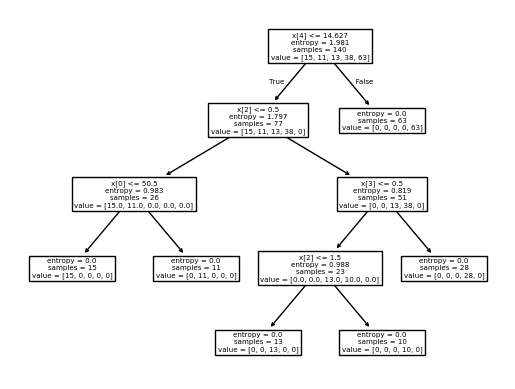

In [ ]:
plot_tree(drugTree)
plt.show()

In [ ]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(X_trainset,y_trainset)
tree_predictions = drugTree.predict(X_testset)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, tree_predictions))

Decision Trees's Accuracy:  0.8166666666666667


# K-Nearest Neighbors Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [ ]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

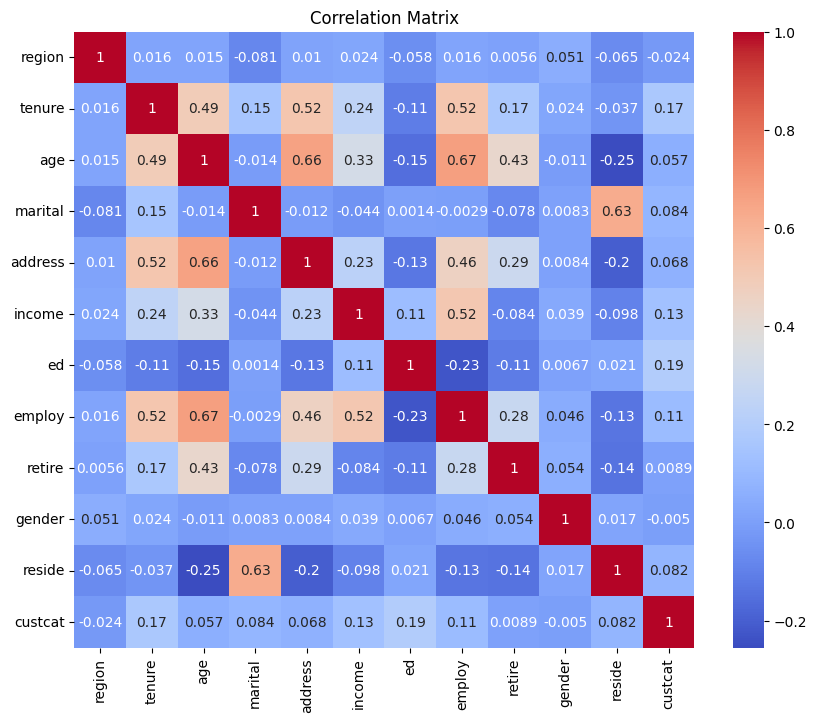

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending = True)
correlation_values

gender     0.004966
retire     0.008908
region     0.023771
age        0.056909
address    0.067913
reside     0.082022
marital    0.083836
employ     0.110011
income     0.134525
tenure     0.166691
ed         0.193864
Name: custcat, dtype: float64

In [ ]:
X = df.drop('custcat',axis=1)
y = df['custcat']

In [ ]:
X_norm = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

In [ ]:
k = 3
#Train Model and Predict
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)

In [ ]:
yhat = knn_model.predict(X_test)

In [ ]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.825


In [ ]:
k = 6

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train,y_train)
yhat = knn_model.predict(X_test)

print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.75


In [ ]:
Ks = 100
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

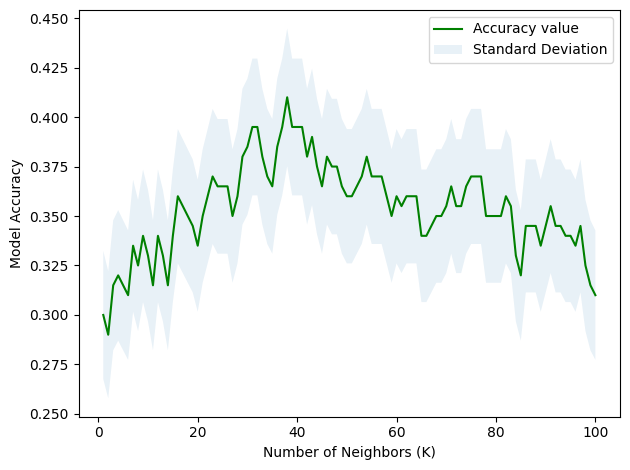

In [ ]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Comparing Random Forest and XGBoost modeling Performance

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [ ]:
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
N_observations, N_features = X_train.shape

print("Number of Observations:" + str(N_observations))
print("Number of Features:" + str(N_features))

Number of Observations:16512
Number of Features:8


In [ ]:
# Initialize models
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

In [ ]:
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_trian_time = end_time_rf - start_time_rf

In [ ]:
print("Random Forest Training Time: {:.2f} seconds".format(rf_trian_time))

Random Forest Training Time: 24.47 seconds


In [ ]:
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

In [ ]:
print("XGBoost Training Time: {:.2f} seconds".format(xgb_train_time))

XGBoost Training Time: 0.43 seconds


In [ ]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_predict_time = end_time_rf - start_time_rf
print("Random Forest Prediction Time: {:.2f} seconds".format(rf_predict_time))

Random Forest Prediction Time: 0.20 seconds


In [ ]:
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
print("XGBoost Prediction Time: {:.2f} seconds".format(end_time_xgb - start_time_xgb))

XGBoost Prediction Time: 0.02 seconds


In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Random Forest Mean Squared Error:", mse_rf)
print("XGBoost Mean Squared Error:", mse_xgb)
print("Random Forest R-squared:", r2_rf)
print("XGBoost R-squared:", r2_xgb)

Random Forest Mean Squared Error: 0.2553684927247781
XGBoost Mean Squared Error: 0.2225899267544737
Random Forest R-squared: 0.8051230593157366
XGBoost R-squared: 0.8301370561019205


In [ ]:
std_y = np.std(y_test)
print("Standard Deviation of y_test:", std_y)

Standard Deviation of y_test: 1.1447309632576992


In [ ]:
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Measure prediciton time for XGBoost
start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')
print(f'Random Forest:  Training Time = {rf_trian_time:.3f} seconds, Testing time = {rf_pred_time:.3f} seconds')
print(f'      XGBoost:  Training Time = {xgb_train_time:.3f} seconds, Testing time = {xgb_pred_time:.3f} seconds')
std_y = np.std(y_test)

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301
Random Forest:  Training Time = 24.472 seconds, Testing time = 0.206 seconds
      XGBoost:  Training Time = 0.434 seconds, Testing time = 0.016 seconds


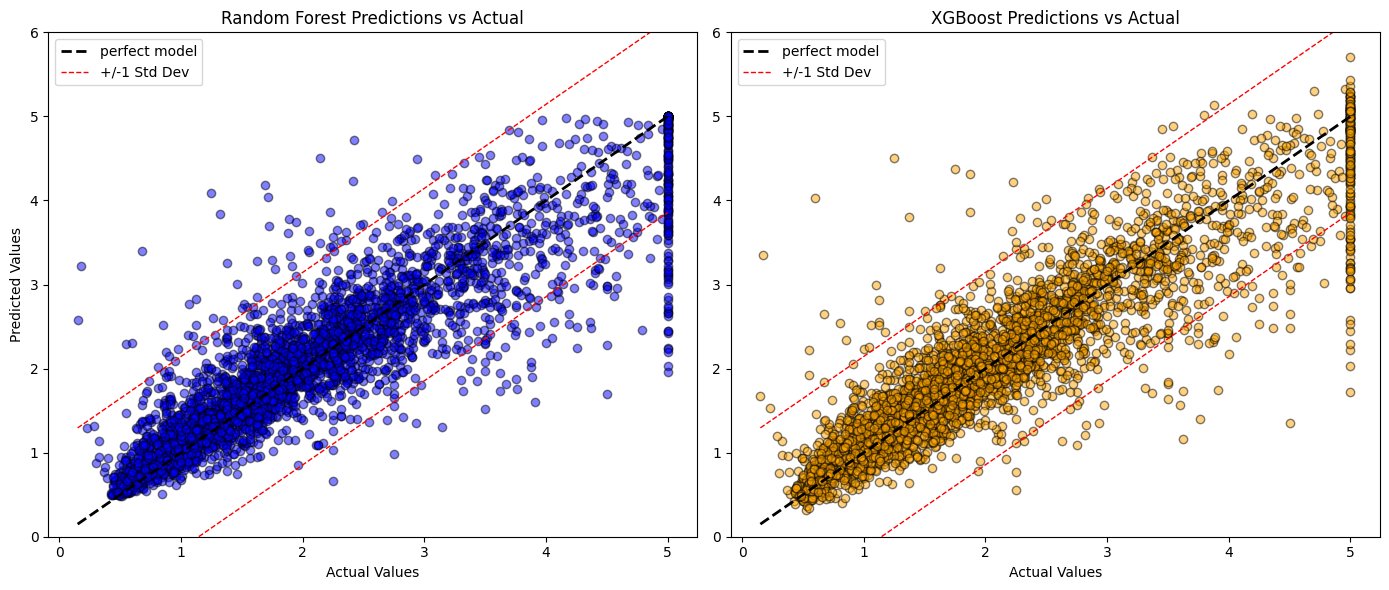

In [ ]:
plt.figure(figsize=(14, 6))

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

# Credit Card Fraud Detection With Decision Trees and SVM

In [ ]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

# Credit Fraud Detection with Decision Trees and SVM

In [ ]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data=pd.read_csv(url)
raw_data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

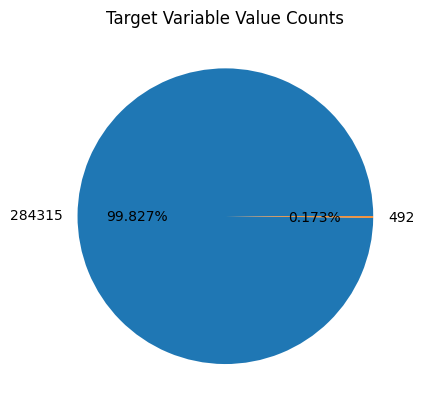

In [ ]:
labels = raw_data['Class'].value_counts()
labels

fig, ax = plt.subplots()
ax.pie(labels, labels = labels, autopct = '%1.3f%%')
ax.set_title("Target Variable Value Counts")
plt.show()

<Axes: >

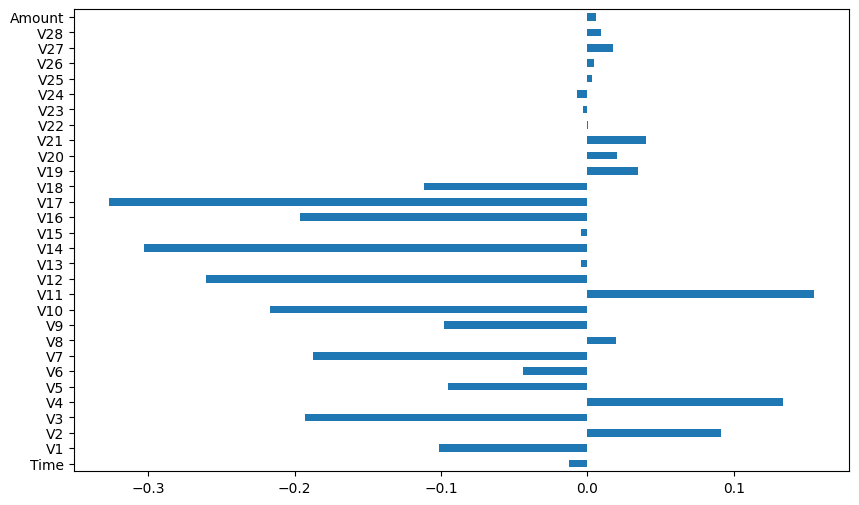

In [ ]:
correlation_values = raw_data.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [ ]:
raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(raw_data.iloc[:, 1:30])
data_matrix = raw_data.values

X = data_matrix[:, 1:30]
y = data_matrix[:, 30]

X = normalize(X, norm = "l1")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
# for reproducible output across multiple function calls, set random_state to a given integer value
dt = DecisionTreeClassifier(max_depth=4, random_state=35)

dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

In [ ]:
# for reproducible output across multiple function calls, set random_state to a given integer value
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
y_pred_dt = dt.predict_proba(X_test)[:,1]

In [ ]:
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt))

Decision Tree ROC-AUC score : 0.939


In [ ]:
y_pred_svm = svm.decision_function(X_test)

In [ ]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.986


In [ ]:
correlation_values = abs(raw_data.corr()['Class'].drop('Class')).sort_values(ascending = True)
correlation_values = correlation_values.sort_values(ascending = False)[:6]
correlation_values

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
Name: Class, dtype: float64

In [ ]:
X = data_matrix[:,[3,10,12,14,16,17]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
w_train = compute_sample_weight('balanced', y_train)

In [ ]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

In [ ]:
y_pred_svm = svm.decision_function(X_test)

In [ ]:
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.3f}".format(roc_auc_svm))

SVM ROC-AUC score: 0.972


# K means

In [ ]:
import numpy as np
import pandas as pXd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
np.random.seed(0)

In [ ]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

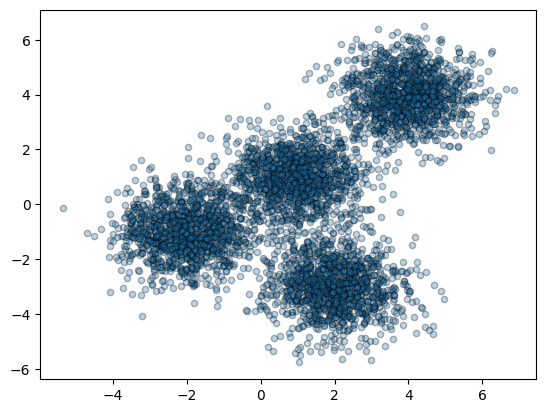

In [ ]:
plt.scatter(X[:, 0], X[:,1], marker = ".", alpha = 0.3, ec = 'k', s = 80) # ec = k for color, s for size

In [ ]:
k_means = KMeans(init = 'k-means++', n_clusters = 4, n_init = 12)

In [ ]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [ ]:
k_means_labels = k_means.labels_
print(k_means_labels)
k_means_labels.shape

[0 3 3 ... 1 0 0]


(5000,)

In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

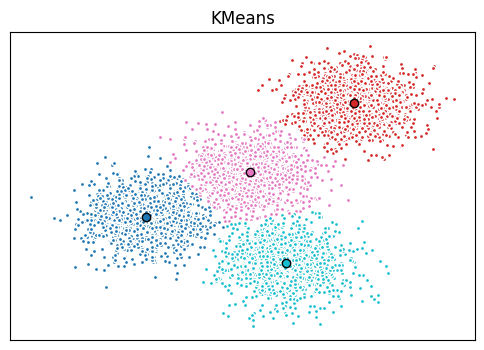

In [ ]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0,1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members,0], X[my_members,1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

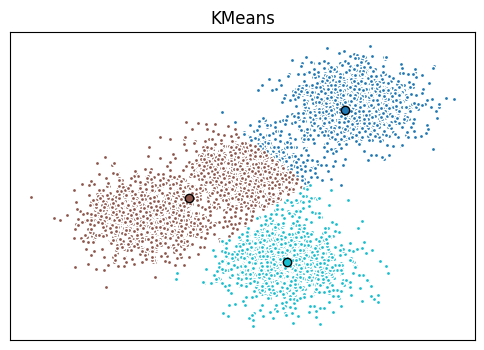

In [ ]:
k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)

k_means.fit(X)

k_means_labels = k_means.labels_

k_means_cluster_centers = k_means.cluster_centers_

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0,1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members,0], X[my_members,1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()


In [ ]:
# Customer segmentation with K-means
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
..           ...  ...  ...             ...     ...        ...         ...   
845          846   27    1               5      26      0.548       1.220   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio  
0          0.0  NBA001              6.3  
1          0.0  NBA021             12.8  
2          1.0  NBA013             20.9  
3          0.0  NBA009              6.3  
4          0.0  NBA008              7.2  
..         ...     ...              ...  
845        NaN  NBA007              6.8  
846        0.0  NBA002              7.0  
847        1.0  NBA001             33.4  
848        0.0  NBA012              2.9  
849        0.0  NBA025              8.6  

[850 rows x 10 columns]

In [ ]:
cust_df = cust_df.drop('Address', axis=1)
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [ ]:
X = cust_df.values[:, 1:]
Clus_dataset = StandardScaler().fit_transform(X)

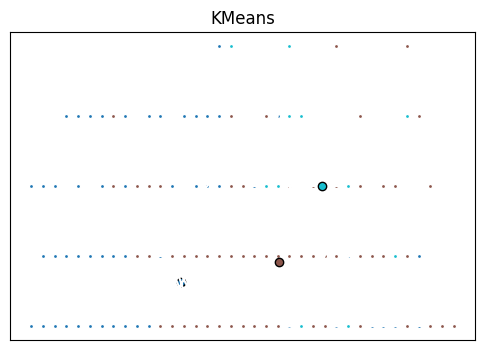

In [ ]:
k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)

k_means.fit(X)

k_means_labels = k_means.labels_

k_means_cluster_centers = k_means.cluster_centers_

fig = plt.figure(figsize=(6, 4))

colors = plt.cm.tab10(np.linspace(0,1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members,0], X[my_members,1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [ ]:
cust_df["Clus_km"] = k_means_labels

In [ ]:
cust_df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0          439.80226  32.775895  1.632768        6.169492   30.642185   
1          403.56129  41.103226  1.916129       15.135484   81.122581   
2          374.00000  44.785714  3.000000       17.857143  219.714286   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         1.003795    2.090910   0.284369        10.146893  
1         3.024935    5.605258   0.180645        10.848387  
2         6.115429   11.546357   0.285714         8.064286

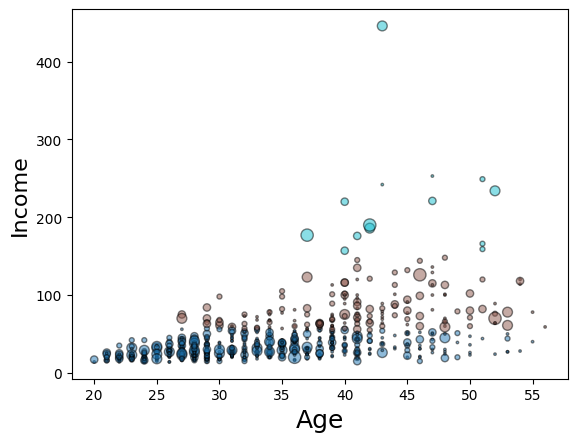

In [ ]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means_labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

In [ ]:
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=k_means_labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()

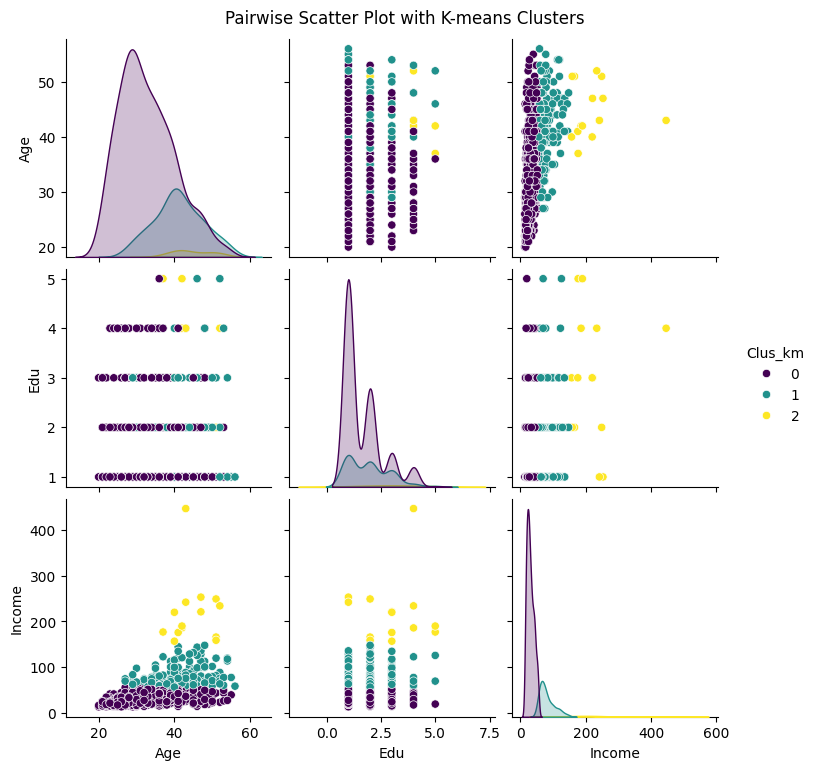

In [ ]:
cust_df_sub = cust_df[['Age', 'Edu','Income','Clus_km']].copy()
sns.pairplot(cust_df_sub, hue='Clus_km', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot with K-means Clusters', y=1.02)
plt.show()

# Comparing DBSCAN and HDBSCAN

In [ ]:
!pip install contextily==1.6.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 93.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.preprocessing import StandardScaler

# geographical tools
import geopandas as gpd  # pandas dataframe-like geodataframes for geographical data
import contextily as ctx  # used for obtianing a basemap of Canada
from shapely.geometry import Point

import warnings
warnings.filterwarnings('ignore')

import requests
import zipfile
import io
import os

In [ ]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/YcUk-ytgrPkmvZAh5bf7zA/Canada.zip"

output_dir = "./"
os.makedirs(output_dir, exist_ok=True)

response = requests.get(file_url)
response.raise_for_status()

# Step 1: Download the ZIP file
response = requests.get(file_url)
response.raise_for_status()  # Ensure the request was successful
# Step 2: Open the ZIP file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Step 3: Iterate over the files in the ZIP
    for file_name in zip_ref.namelist():
        if file_name.endswith('.tif'):  # Check if it's a TIFF file
            # Step 4: Extract the TIFF file
            zip_ref.extract(file_name, output_dir)
            print(f"Downloaded and extracted: {file_name}")

Downloaded and extracted: Canada.tif


In [ ]:
def plot_clustered_locations(df, title = "Museums clustered by Proximity"):

  gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

  gdf = gdf.to_crs(epsg = 3857)

  fig, ax = plt.subplots(figsize = (15, 10))

  non_noise = gdf[gdf['Cluster'] != -1]
  noise = gdf[gdf['Cluster'] == -1]

  noise.plot(ax = ax, column = 'Cluster', cmap = 'tab10', markersize = 30, ec = 'k', legend = False, alpha = 0.6)

  ctx.add_basemap(ax, source='./Canada.tif', zoom=4)

    # Format plot
  plt.title(title, )
  plt.xlabel('Longitude', )
  plt.ylabel('Latitude', )
  ax.set_xticks([])
  ax.set_yticks([])
  plt.tight_layout()

  # Show the plot
  plt.show()

In [ ]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/r-maSj5Yegvw2sJraT15FA/ODCAF-v1-0.csv'
df = pd.read_csv(url, encoding = "ISO-8859-1")

In [ ]:
df.head()

Index                      Facility_Name            Source_Facility_Type  \
0      1                   #Hashtag Gallery                              ..   
1      2  'Ksan Historical Village & Museum  historic site-building or park   
2      3               'School Days' Museum       community/regional museum   
3      4                   10 Austin Street       built heritage properties   
4      5              10 Gates Dancing Inc.                            arts   

         ODCAF_Facility_Type                      Provider Unit Street_No  \
0                    gallery                       toronto   ..       801   
1                     museum  canadian museums association   ..      1500   
2                     museum  canadian museums association   ..       427   
3  heritage or historic site                       moncton   ..        10   
4              miscellaneous                        ottawa   ..        ..   

   Street_Name Postal_Code         City Prov_Terr  \
0  dundas st w     M6J 1V2      toronto        on   
1       62 hwy     V0J 1Y0     hazelton        bc   
2     queen st     E3B 5R6  fredericton        nb   
3    austin st     E1C 1Z6      moncton        nb   
4           ..          ..       ottawa        on   

                               Source_Format_Address     CSD_Name   CSDUID  \
0                                    801 dundas st w      Toronto  3520005   
1  1500 hwy 62 hazelton british columbia v0j 1y0 ...     Hazelton  5949022   
2  427 queen st fredericton new brunswick e3b 5r6...  Fredericton  1310032   
3                                       10 austin st      Moncton  1307022   
4                                                 ..       Ottawa  3506008   

  PRUID     Latitude     Longitude  
0    35  43.65169472  -79.40803272  
1    59   55.2645508  -127.6428124  
2    13    45.963283   -66.6419017  
3    13  46.09247776  -64.78022946  
4    35  45.40856224  -75.71536766

In [ ]:
df[['ODCAF_Facility_Type']].value_counts()

ODCAF_Facility_Type                 
library or archives                     3013
museum                                  1938
gallery                                  810
heritage or historic site                620
theatre/performance and concert hall     583
festival site                            346
miscellaneous                            343
art or cultural centre                   225
artist                                    94
Name: count, dtype: int64

In [ ]:
df[df['ODCAF_Facility_Type']=='museum'].value_counts()

Index  Facility_Name                                                     Source_Facility_Type                                ODCAF_Facility_Type  Provider                      Unit  Street_No  Street_Name                Postal_Code  City           Prov_Terr  Source_Format_Address                                                                      CSD_Name       CSDUID   PRUID  Latitude     Longitude   
9798   ..                                                                museums and galleries                               museum               victoria                      ..    ..         ..                         ..           victoria       bc         ..                                                                                         Victoria       5917034  59     48.4260053   -123.3691883    1
2      'Ksan Historical Village & Museum                                 historic site-building or park                      museum               canadian museums association  ..    1500       62 hwy                     V0J 1Y0      hazelton       bc         1500 hwy 62 hazelton british columbia v0j 1y0 canada                                       Hazelton       5949022  59     55.2645508   -127.6428124    1
9709   Wood Mountain Rodeo Ranch Museum                                  community/regional museum                           museum               canadian museums association  ..    ..         ..                         S0H 1P0      wood mountain  sk         wood mountain regional park wood mountain saskatchewan s0h 1p0 canada                      Wood Mountain  4703012  47     ..           ..              1
9702   Women's Art Museum of Canada / Musée D'Art De La Femme Du Canada  art gallery                                         museum               canadian museums association  200   8627       marie anne gaboury street  T6C 3N1      edmonton       ab         la cité francophone 200 8627 marie-anne-gaboury 91 street edmonton alberta t6c 3n1 canada  Edmonton       4811061  48     ..           ..              1
9692   Winters Building: Reproduction                                    museum                                              museum               ottawa                        ..    ..         ..                         ..           ottawa         on         ..                                                                                         Ottawa         3506008  35     45.51595048  -75.38956014    1
                                                                                                                                                                                                                                                                                                                                                                                                                         ..
24     221A Artist Run Centre                                            museum/gallery                                      museum               vancouver                     ..    221        georgia st e               V6A 1Z6      vancouver      bc         221 e georgia st vancouver bc v6a 1z6                                                      Vancouver      5915022  59     49.278786    -123.098796     1
21     2 For Art                                                         non-commercial art museums and galleries            museum               mississauga                   ..    177        lakeshore rd e             L5G 4T9      mississauga    on         177 lakeshore rd e                                                                         Mississauga    3521005  35     43.55602758  -79.58047695    1
18     17 Wing Heritage Collection                                       aeronautics and space museum transportation museum  museum               canadian museums association  ..    ..         ..                         R3J 3Y5      winnipeg       mb         air heritage park air force way winnip

In [ ]:
df = df[['Latitude', 'Longitude']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7972 entries, 0 to 7971
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Latitude   7972 non-null   object
 1   Longitude  7972 non-null   object
dtypes: object(2)
memory usage: 124.7+ KB


In [ ]:
df = df[df.Latitude!='..']

# Remove any non-numeric characters from the Latitude column
df['Latitude'] = df['Latitude'].astype(str).str.replace('[^0-9.-]', '', regex=True)

# Convert to float
df[['Latitude','Longitude']] = df[['Latitude','Longitude']].astype('float')

In [ ]:
coords_scaled = df.copy()
coords_scaled["Latitude"] = 2 * coords_scaled["Latitude"]

In [ ]:
min_samples=3 # minimum number of samples needed to form a neighbourhood
eps=1.0 # neighbourhood search radius
metric='euclidean' # distance measure

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric).fit(coords_scaled)

In [ ]:
df['Cluster'] = dbscan.fit_predict(coords_scaled)  # Assign the cluster labels

# Display the size of each cluster
df['Cluster'].value_counts()

Cluster
 0     4643
 2      829
 10     515
 3      270
 7      171
-1       84
 14      25
 26      21
 6       20
 11      14
 17      12
 24      10
 22      10
 4        8
 31       7
 12       7
 35       7
 34       6
 15       6
 1        5
 18       5
 32       5
 27       5
 38       4
 8        4
 9        4
 21       4
 19       4
 20       4
 33       4
 16       4
 25       4
 5        3
 13       3
 29       3
 28       3
 23       3
 30       3
 36       3
 37       3
 39       3
Name: count, dtype: int64

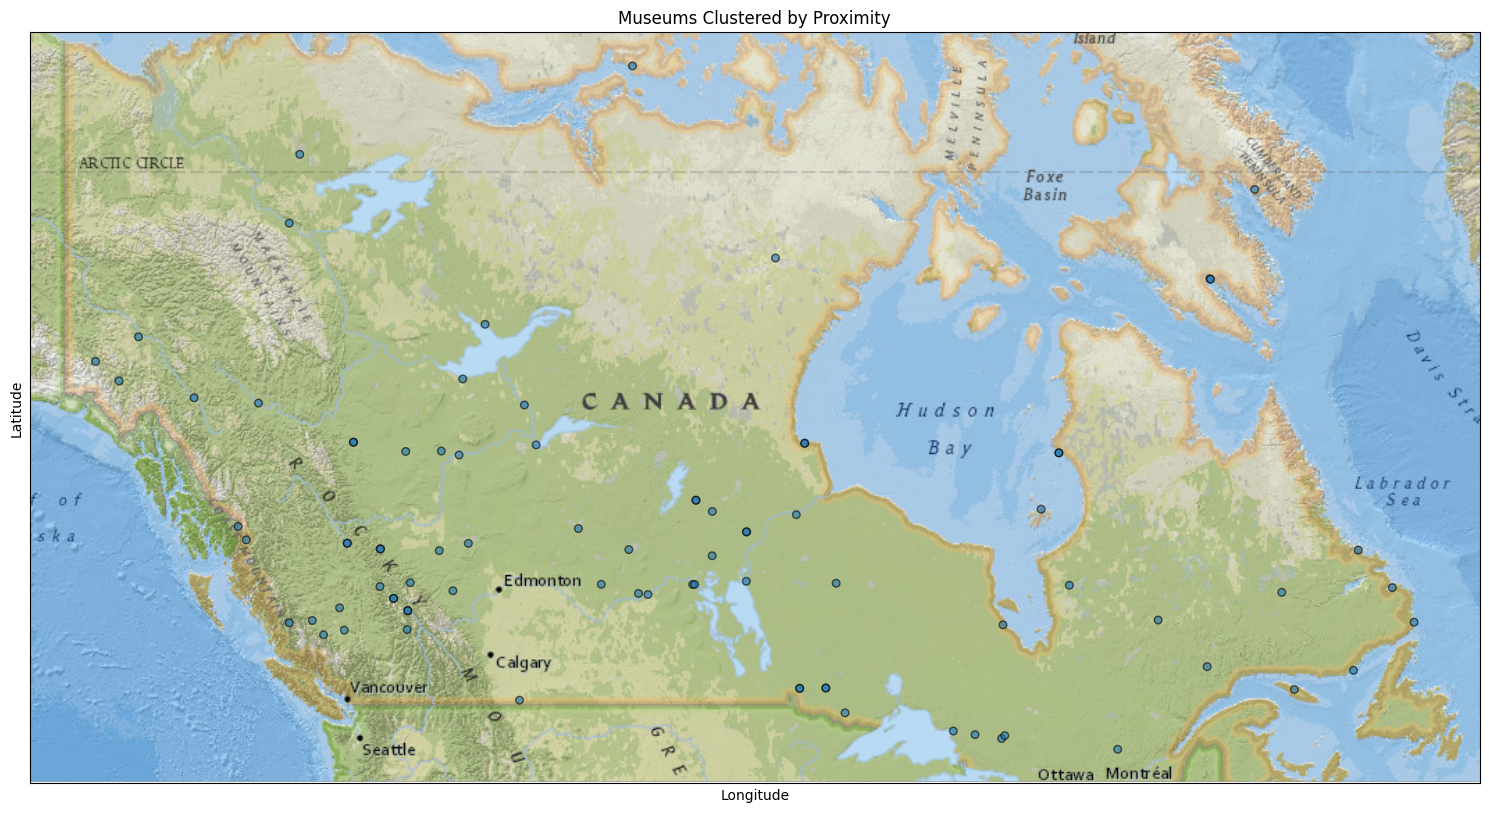

In [ ]:
plot_clustered_locations(df, title='Museums Clustered by Proximity')

In [ ]:
min_samples=None
min_cluster_size=3
hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')

In [ ]:
df['Cluster'] = hdb.fit_predict(coords_scaled)
df['Cluster'].value_counts()

Cluster
-1      2011
 344      80
 329      38
 82       37
 251      33
        ... 
 311       3
 485       3
 381       3
 29        3
 370       3
Name: count, Length: 630, dtype: int64

# Applications of Principal Component Analysis

## Objectives

After completing this lab, you will be able to:

* Use Principal Component Analysis (PCA) to project 2-D data onto its principal axes
* Use PCA for feature space dimensionality reduction
* Relate explained variance to feature importance and noise reduction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]

X = np.random.multivariate_normal(mean, cov, size = 200)

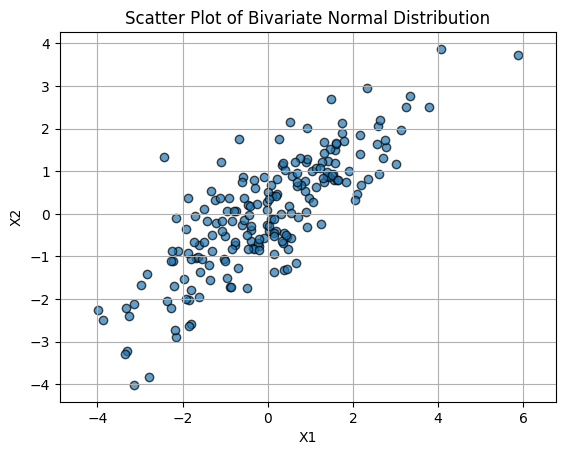

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], edgecolor = "k", alpha = 0.7)
plt.title("Scatter Plot of Bivariate Normal Distribution")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [ ]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

The answer shows that the first component explains about 90% and the second one explains about 9%.

In [ ]:
projection_pca1 = np.dot(X, components[0])
projection_pca2 = np.dot(X, components[1])

In [ ]:
x_pca1 = projection_pca1 * components[0][0]
y_pca1 = projection_pca1 * components[0][1]

x_pca2 = projection_pca2 * components[1][0]
y_pca2 = projection_pca2 * components[1][1]

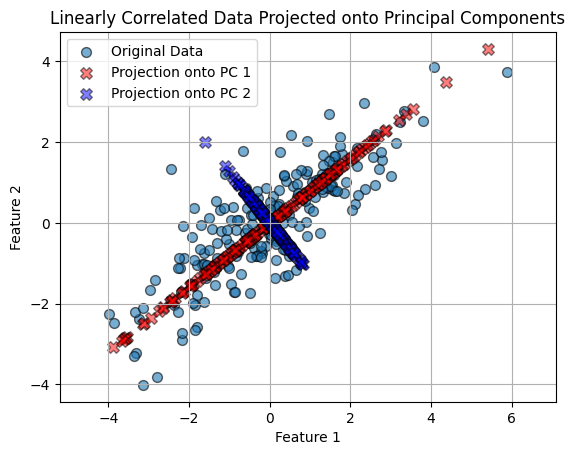

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:,1], label = 'Original Data', ec = "k", s = 50, alpha=0.6)

plt.scatter(x_pca1, y_pca1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pca2, y_pca2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

* The first direction, in red, is aligned in the direction having the widest variation.
* The second direction, in blue, is aligned in the the direction having lower variance.

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print(target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

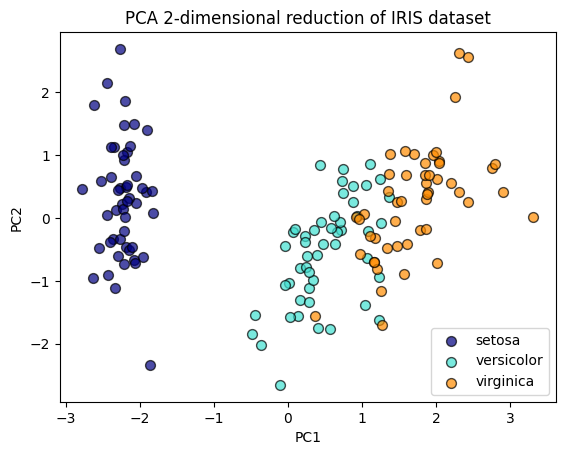

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [ ]:
ratio = pca.explained_variance_ratio_.sum()
print(f"The first two components explain {ratio*100:.1f}% of the variance")

The first two components explain 95.8% of the variance


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

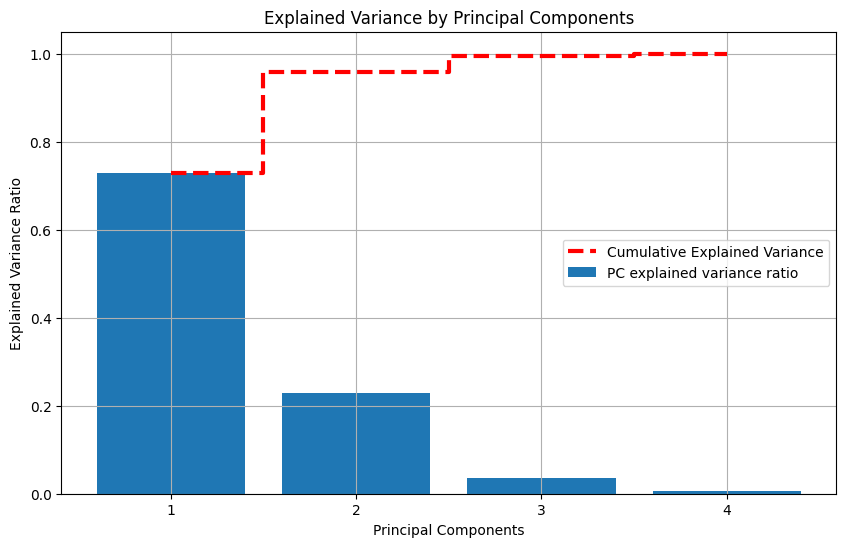

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()

# T-SNE and UMAP Dimension Reduction Models

## Objectives

After completing this lab you will be able to:

* Apply tSNE and UMAP to feature space dimensionality reduction problems
* Use PCA as a baseline comparison for evaluating tSNE and UMAP results


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import umap.umap_ as UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import plotly.express as px
from sklearn.datasets import make_blobs

In [ ]:
centers = [ [ 2, -6, -6],
            [-1,  9,  4],
            [-8,  7,  2],
            [ 4,  7,  9] ]

cluster_std = [1,1,2,3.5]

X, y = make_blobs(n_samples=500, centers=centers, n_features= 3, cluster_std=cluster_std, random_state=42)

In [ ]:
df = pd.DataFrame(X, columns = ['Feature 1', 'Feature 2', 'Feature 3'])

fig = px.scatter_3d(df, x='Feature 1', y='Feature 2', z='Feature 3', color=y)
fig.update_traces(marker=dict(size=5, line=dict(width=0.5)), selector=dict(mode='markers'))
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'))
fig.show()

- The blobs have varying densities.
- One blob is distinct from the others.
- The two largest blobs are distinct from each other, but both have a bit of overlap with the other blob between them.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(n_components = 2, random_state = 42, perplexity=30, max_iter = 1000)
X_tsne = tsne.fit_transform(X_scaled)

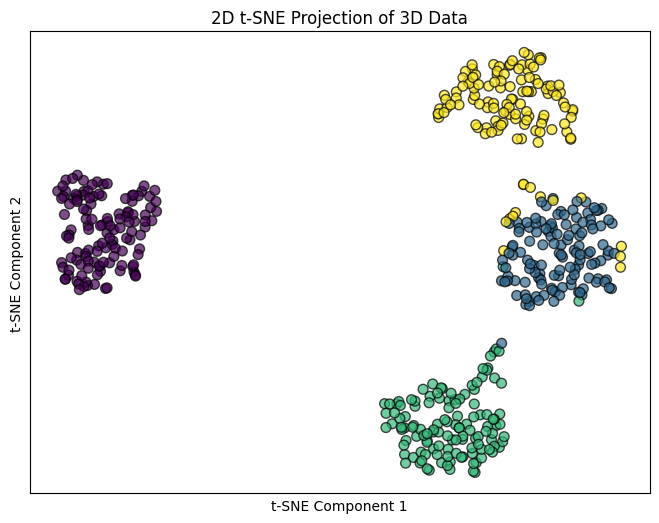

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of 3D Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

- t-SNE projected the data into four distinct clusters, although the original data had some overlap between a few clusters.
- You can see that some of the points ended up in the "wrong" cluster, although to be fair, t-SNE has no knowledge of which clusters the points actually belong to.
- All the clusters have similar densities.
- Two of the blobs are distinct from each other but "gave up" some of their points to the blob they originally had overlapped with.
- A "perfect" result would not completely separate the overlaps between blobs.
- Notice that the distance between the blobs is consistent with the degree to which they were originally separated.

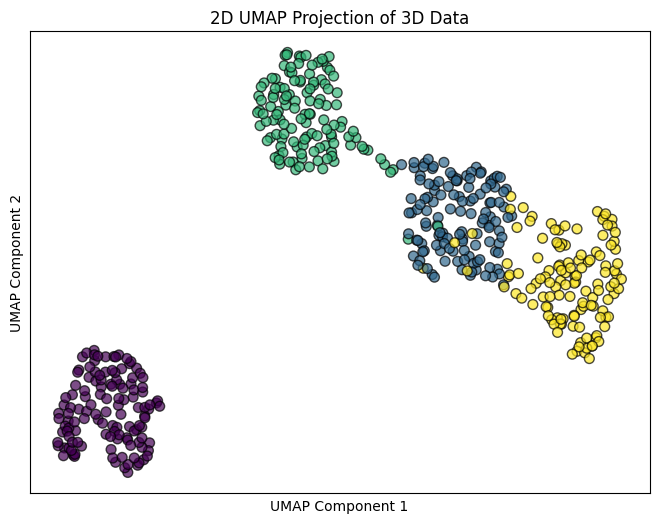

In [ ]:
# Apply UMAP to reduce the dimensionality to 2D
umap_model = UMAP.UMAP(n_components=2, random_state=42, min_dist=0.5, spread=1,n_jobs=1)

X_umap = umap_model.fit_transform(X_scaled)

# Plot the 2D UMAP projection result
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of 3D Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()


- UMAP correctly projected the data into four partially distinct clusters, with one cluster completely distinct from the others.
- Unlike t-SNE, it has preserved the connectedness that the original data had with the partially overlapping clusters.
- You can see that, like t-SNE, some of the points ended up in the "wrong" cluster.
- Again, like t-SNE, all the clusters have similar densities.
- A "perfect" result would not completely separate the overlaps between blobs, because they actually do overlap in the original feature space.
- The distance between the clusters is again consistent with the degree to which they were originally separated.

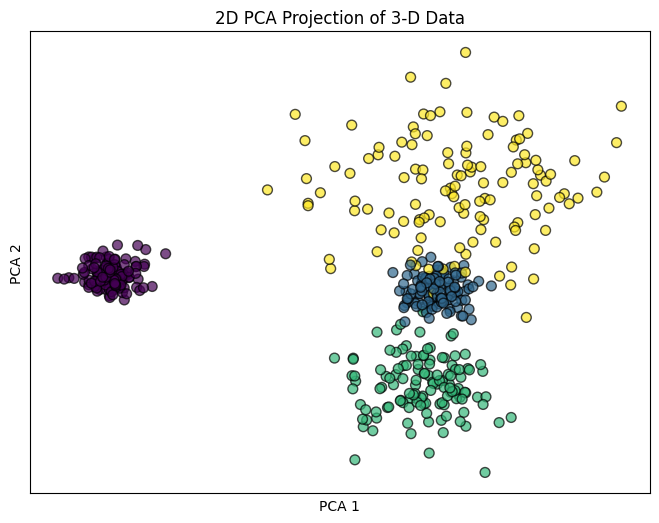

In [ ]:
# Apply PCA to reduce the dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig = plt.figure(figsize=(8, 6))

# Plot the 2D PCA result (right)
ax2 = fig.add_subplot(111)
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax2.set_title("2D PCA Projection of 3-D Data")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

- PCA faithfully preserved the relative blob densities.
- PCA also preserved the relative separation between blobs.
- The distance between the clusters is very consistent with the degree to which they were originally separated.
- PCA and t-SNE took very little time to complete compared to UMAP.
- IMNSHO, PCA outperformed both t-SNE and UMAP in this experiment.
This points to a common tendency to want to implement more advanced algorithms.
The default result is not always an improvement over the simpler established methods.

#Evaluating Classification Models


## Objectives


After completing this lab, you will be able to:

* Implement and evaluate the performance of classification models on real-world data
* Interpret and compare various evaluation metrics and the confusion matrix for each model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

* Braset Cancer Dataset

In [ ]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

In [ ]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
print(data.target_names)

['malignant' 'benign']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


* Add Some Noise for the purpose of :
- Make our model more realistic.
- Test how well it performs when data isn’t perfectly clean.

In [ ]:
np.random.seed(42)
noise_fator = 0.5
X_noisy = X_scaled + noise_fator * np.random.normal(loc=0.0, scale = 1.0, size = X.shape)

df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [ ]:
print("Original Data:")
df.head()

Original Data:


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   worst concave points  worst symmetry  worst fractal dimension  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [ ]:
print("\nNoisy Data:")
df_noisy.head()


Noisy Data:


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.345421     -2.142467        1.593778   1.745890         1.451390   
1     1.528967      0.572507        1.679206   1.379853        -0.415690   
2     1.340301      0.363357        1.013336   0.960780         1.348473   
3    -0.720371      0.738055       -0.943714  -0.928295         3.087499   
4     2.145813     -1.606510        2.477970   1.125304         0.573800   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.166446        3.442480             2.916193       1.982778   
1         -1.097493        0.080586            -0.431691      -0.662701   
2          1.731046        1.327473             2.538997       1.120503   
3          2.671152        2.063957             1.582235       2.869940   
4          1.634568        0.875743             1.145344       0.040265   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                2.527027  ...      2.619514      -1.472182         2.337365   
1               -0.770222  ...      1.967969      -0.561744         1.196665   
2               -0.720568  ...      1.402034       0.154582         2.086422   
3                4.793626  ...     -1.240850       0.120727        -0.219824   
4               -0.814188  ...      1.412305      -0.813199         0.534798   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    1.288863          1.035495           2.672126         1.534030   
1    2.196327          0.139888           0.035196        -0.566358   
2    1.197149          0.123161           0.832054         1.312675   
3    0.681600          3.298094           4.044171         1.972232   
4    1.313041          0.350498           0.077517        -0.005297   

   worst concave points  worst symmetry  worst fractal dimension  
0              2.483925        2.450303                 1.791168  
1              0.932478       -0.078258                 0.768963  
2              2.119376        0.887375                 0.458025  
3              1.591447        6.617453                 5.310977  
4              0.069031       -0.607382                -0.248607  

[5 rows x 30 columns]

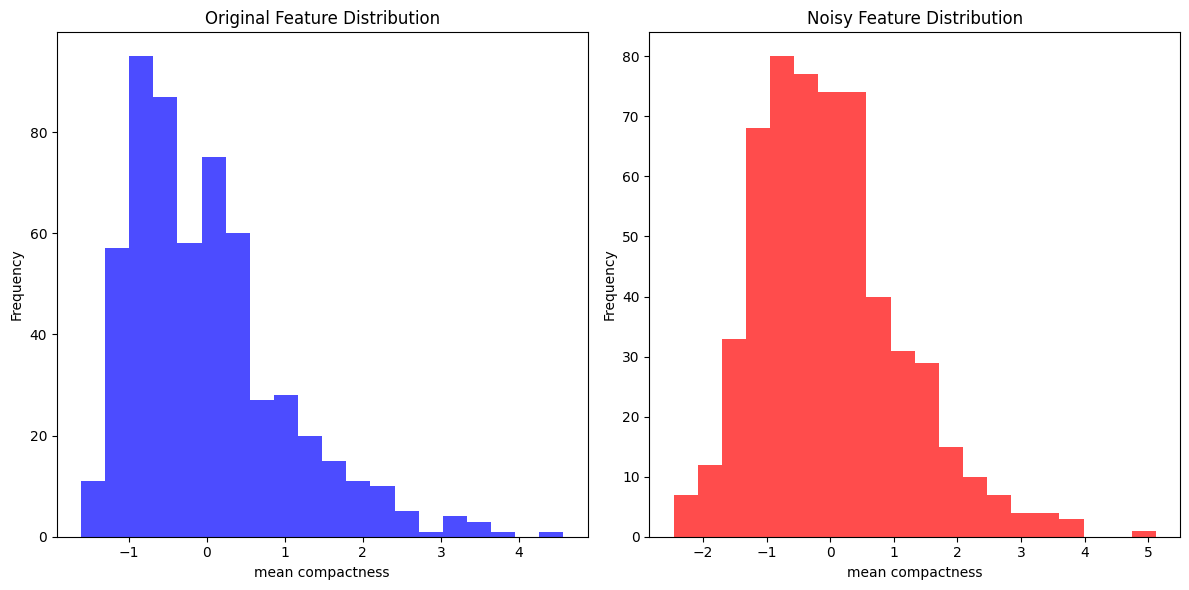

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1, 2, 1)
plt.hist(df[feature_names[5]], bins = 20 , alpha = 0.7, color = 'blue', label = 'Original')
plt.title('Original Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_noisy[feature_names[5]], bins=20, alpha=0.7, color='red', label='Noisy')
plt.title('Noisy Feature Distribution')
plt.xlabel(feature_names[5])
plt.ylabel('Frequency')

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

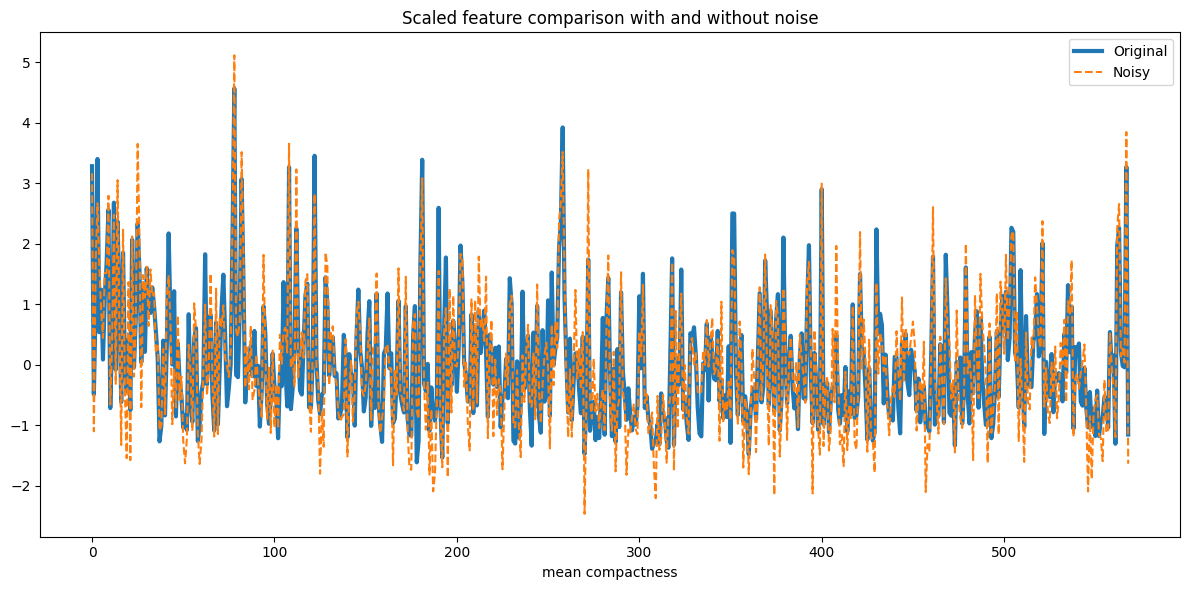

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df[feature_names[5]], label='Original',lw=3)
plt.plot(df_noisy[feature_names[5]], '--',label='Noisy',)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout()
plt.show()

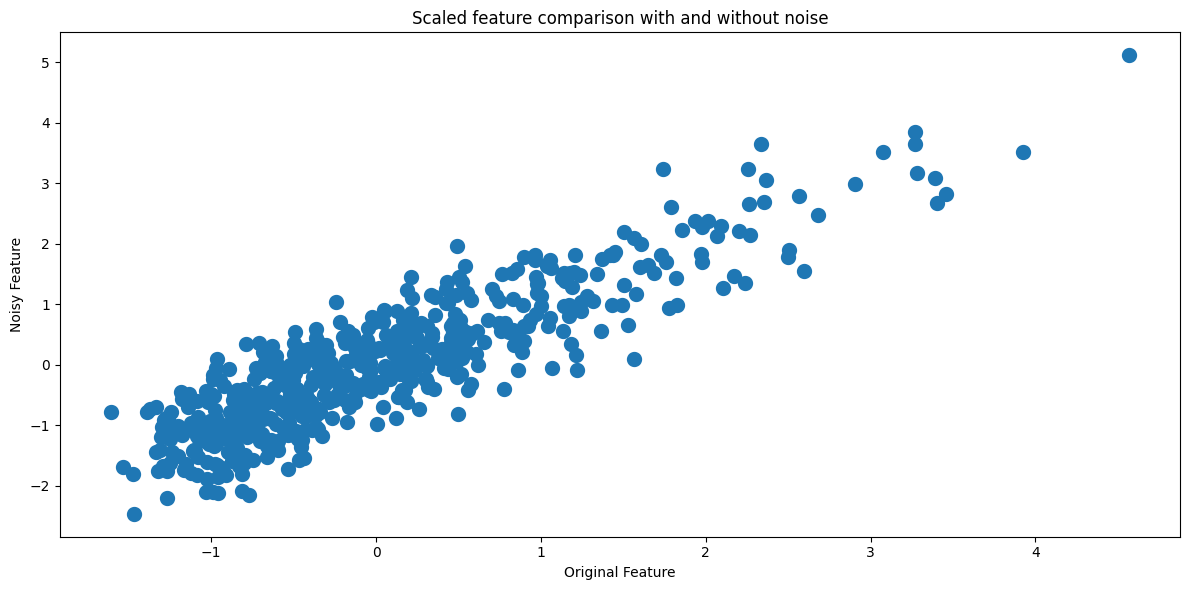

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(df[feature_names[5]], df_noisy[feature_names[5]],lw=5)
plt.title('Scaled feature comparison with and without noise')
plt.xlabel('Original Feature')
plt.ylabel('Noisy Feature')
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
svm = SVC(kernel='linear', C = 1, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [ ]:
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.936
SVM Testing Accuracy: 0.971

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



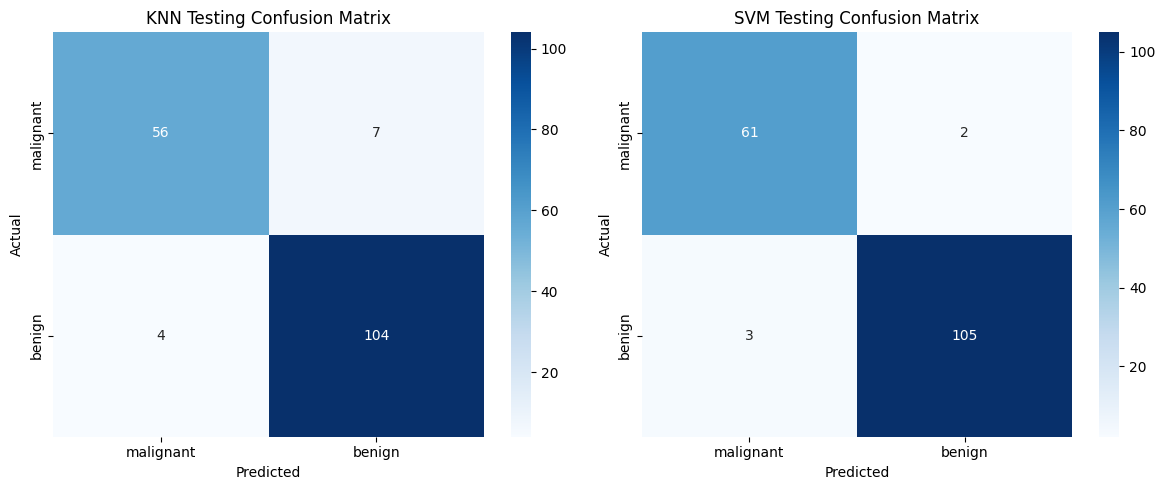

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
# To check whether it is overfitting

y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)


print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("\nKNN Training Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.955
SVM Training Accuracy: 0.972

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



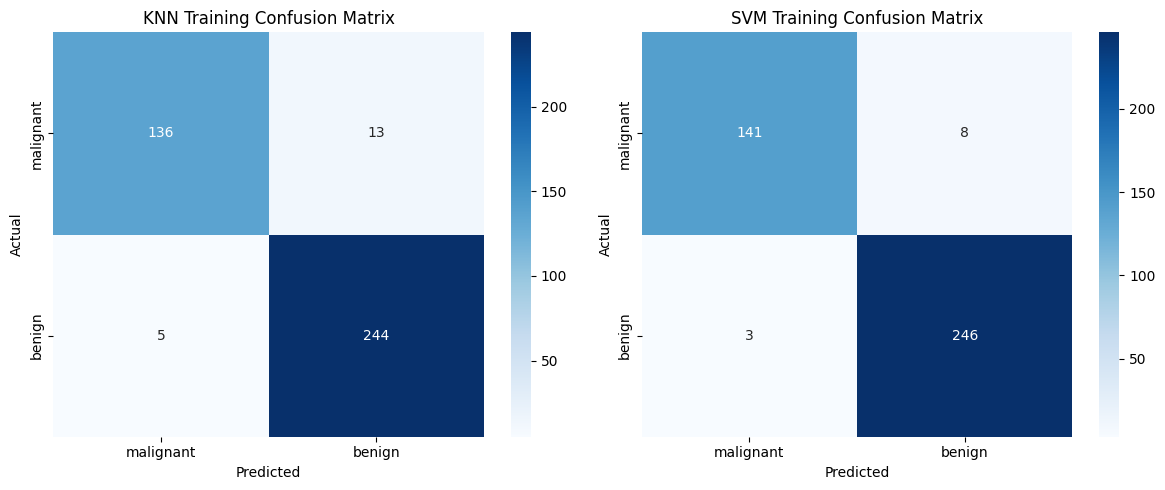

In [ ]:
conf_matrix_knn = confusion_matrix(y_train, y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

| Model | Phase |  Accuracy |
| ------------  | -------- | --------- |
| KNN  | Train  | 95.5% |
| KNN  | Test   | 93.6% |
| SVM  | Train  | 97.2% |
| SVM  | Test   | 97.1% |

For the SVM model, the training and testing accuracies are essentially the same at about 97%. This is ideal - the SVM model is likely not overfit.
For the KNN model, however, the training accuracy is about 2% higher that the test accuracy, indicating there might be some overfitting.

In summary, the SVM model is both more convincing and has a higher accuracy than the KNN model.
Remember, we aren't trying to tune these models; we are just comparing their performance with a fixed set of hyperparamters.

# Evaluating K means Clustering

## Objectives


* Implement and evaluate the performance of k-means clustering on synthetic data
* Interpret various evaluation metrics and visualizations
* Compare clustering results against known classes unsing synthetic data


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Patch
from matplotlib import cm

In [ ]:
def evaluate_clustering(X, labels, n_clusters, ax = None, title_suffix = ''):

  if ax is None:
    ax = plt.gca() # get the current axis if none is provided

  silhouette_avg = silhouette_score(X, labels)
  sample_silhouette_values = silhouette_samples(X, labels)

  # Plot silhouette analysis on the provided axis
  unique_labels = np.unique(labels)
  colormap = cm.tab10
  color_dict = {label: colormap(float(label) / n_clusters) for label in unique_labels}
  y_lower = 10
  for i in unique_labels:
      ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      color = color_dict[i]
      ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax.set_title(f'Silhouette Score for {title_suffix} \n' +
                f'Average Silhouette: {silhouette_avg:.2f}')
  ax.set_xlabel('Silhouette Coefficient')
  ax.set_ylabel('Cluster')
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax.set_xlim([-0.25, 1])  # Set the x-axis range to [0, 1]

  ax.set_yticks([])

In [ ]:
X, y = make_blobs(n_samples=500,  n_features=2, centers=4, cluster_std=[1.0, 3, 5, 2], random_state=42)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

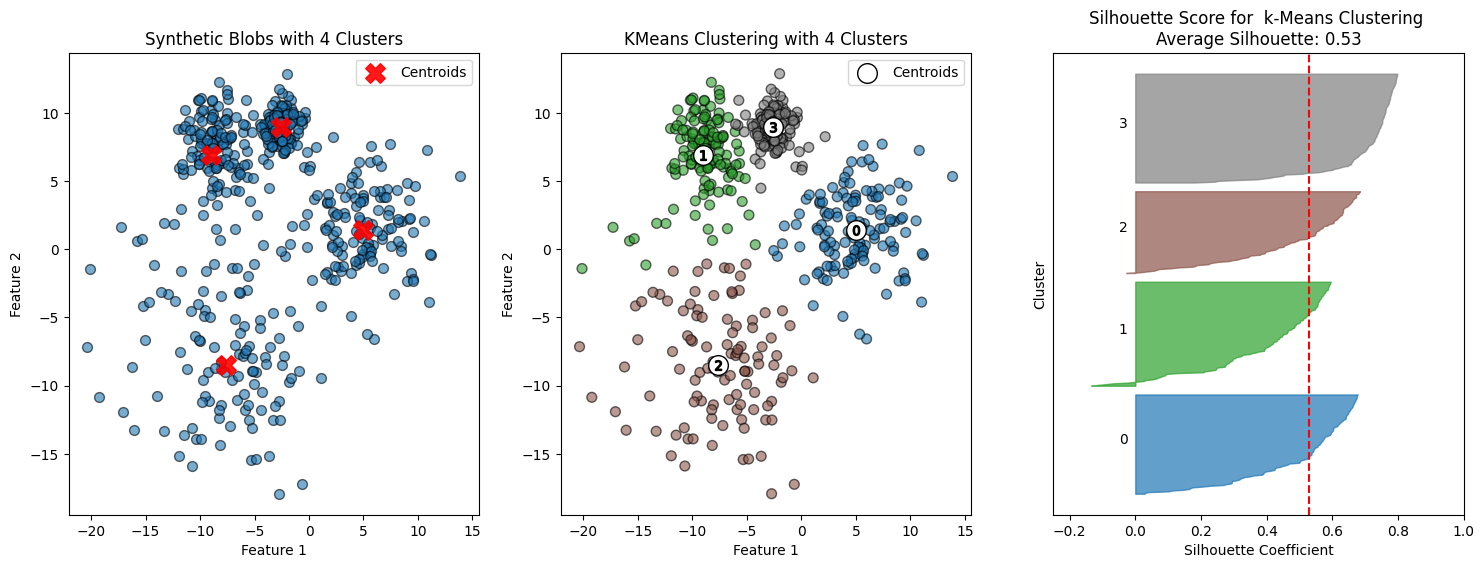

In [ ]:
colormap = cm.tab10

# Plot the blobs
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.6, edgecolor='k')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', alpha=0.9, label='Centroids')
plt.title(f'Synthetic Blobs with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot the clustering result
# Create colors based on the predicted labels
colors = colormap(labels.astype(float) / n_clusters)

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6, edgecolor='k')

# Label the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
    label='Centroids'
)
# Label the custer number
for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Evaluate the clustering
plt.subplot(1, 3, 3)
evaluate_clustering(X, labels, n_clusters, title_suffix=' k-Means Clustering')
plt.show()

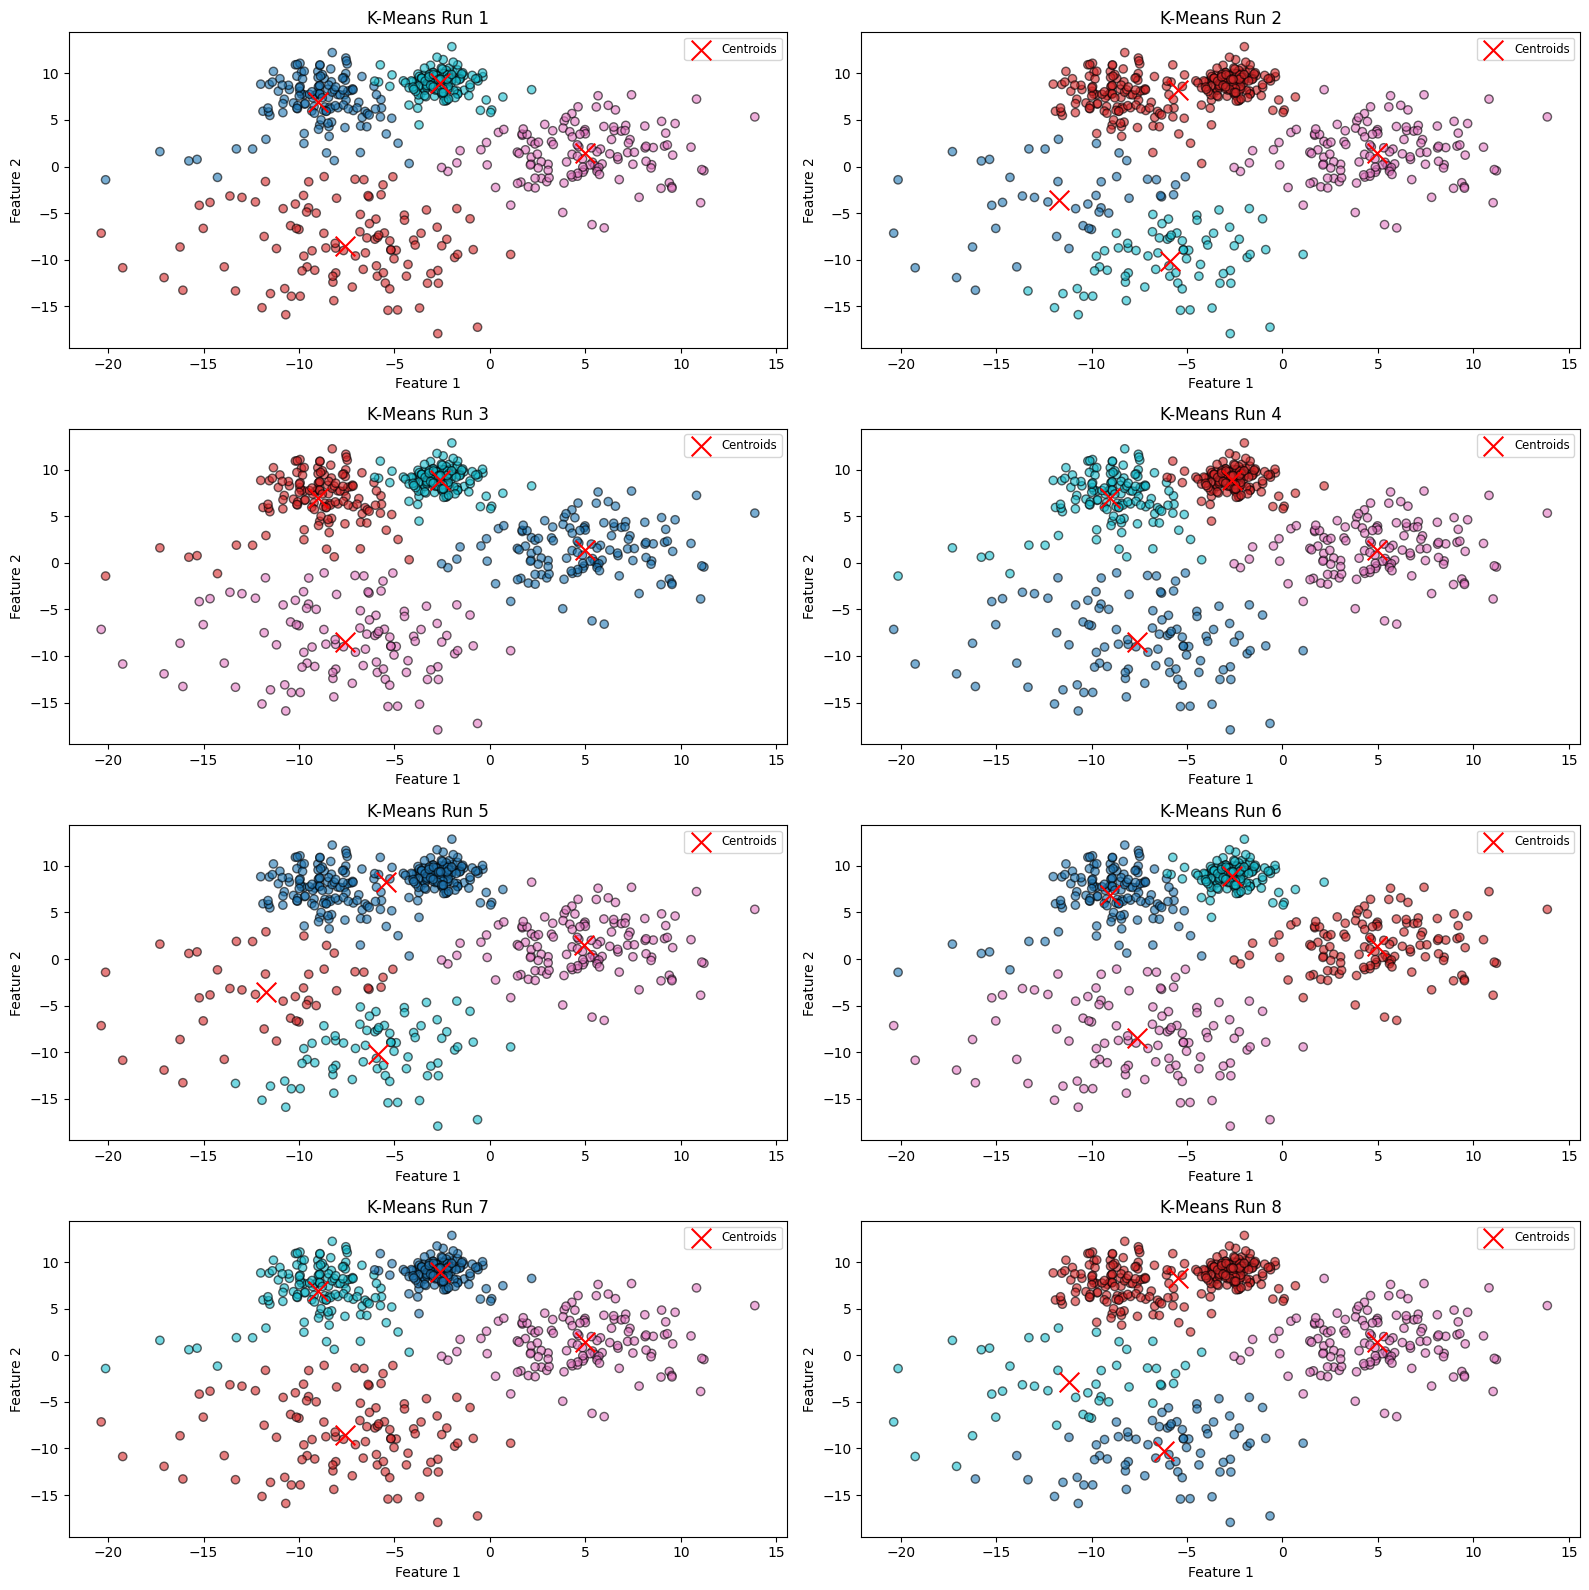

Run 1: Inertia=7633.51
Run 2: Inertia=8575.44
Run 3: Inertia=7633.51
Run 4: Inertia=7633.51
Run 5: Inertia=8575.44
Run 6: Inertia=7633.51
Run 7: Inertia=7633.51
Run 8: Inertia=8556.71


In [ ]:
n_runs = 8
inertia_values = []

# Calculate number of rows and columns needed for subplots
n_cols = 2 # Number of columns
n_rows = -(-n_runs // n_cols) # Ceil division to determine rows
plt.figure(figsize=(16, 16)) # Adjust the figure size for better visualization

# Run K-Means multiple times with different random states
for i in range(n_runs):
    kmeans = KMeans(n_clusters=4, random_state=None)  # Use the default `n_init`
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

    # Plot the clustering result
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='tab10', alpha=0.6, edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
    plt.title(f'K-Means Run {i + 1}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

# Print inertia values
for i, inertia in enumerate(inertia_values, start=1):
    print(f'Run {i}: Inertia={inertia:.2f}')

# Regularization in Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def regression_results(y_true, y_pred, regr_type):

  ev = explained_variance_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  print('Evaluation metrics for ' + regr_type + ' Linear Regression')
  print('explained_variance: ',  round(ev,4))
  print('r2: ', round(r2,4))
  print('MAE: ', round(mae,4))
  print('MSE: ', round(mse,4))
  print('RMSE: ', round(np.sqrt(mse),4))
  print()

In [ ]:
noise = 1
np.random.seed(42)

X = 2 * np.random.rand(1000,1)
y = 4 + 3 * X + noise*np.random.randn(1000, 1)  # Linear relationship with some noise
y_ideal =  4 + 3 * X

y_outlier = pd.Series(y.reshape(-1).copy())

threshold = 1.5
outlier_indices = np.where(X.flatten() > threshold)[0]

num_outliers = 5
selected_indices = np.random.choice(outlier_indices, num_outliers, replace = False)

y_outlier[selected_indices] += np.random.uniform(50, 100, num_outliers)

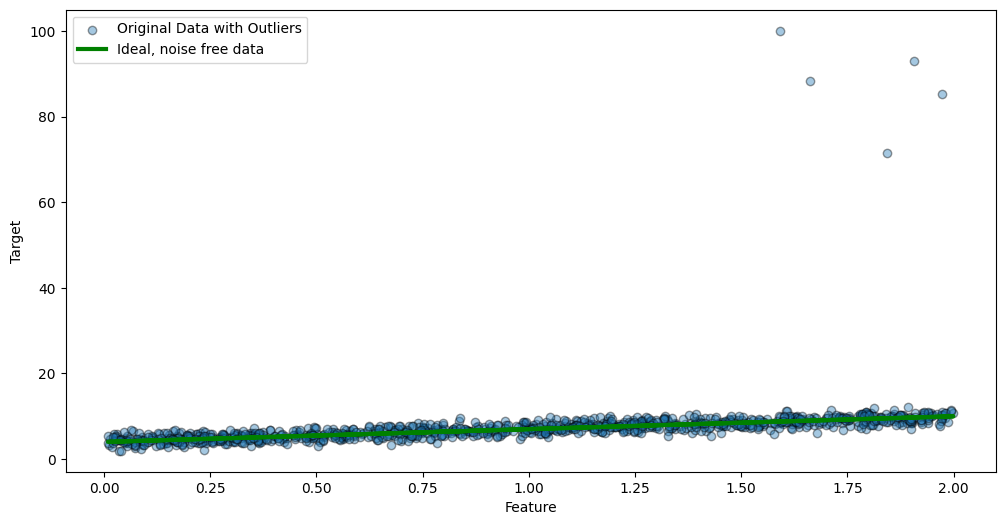

In [ ]:
plt.figure(figsize=(12, 6))

plt.scatter(X, y_outlier, alpha = 0.4, ec = "k", label = "Original Data with Outliers")
plt.plot(X, y_ideal, linewidth = 3, color = "g", label = "Ideal, noise free data")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

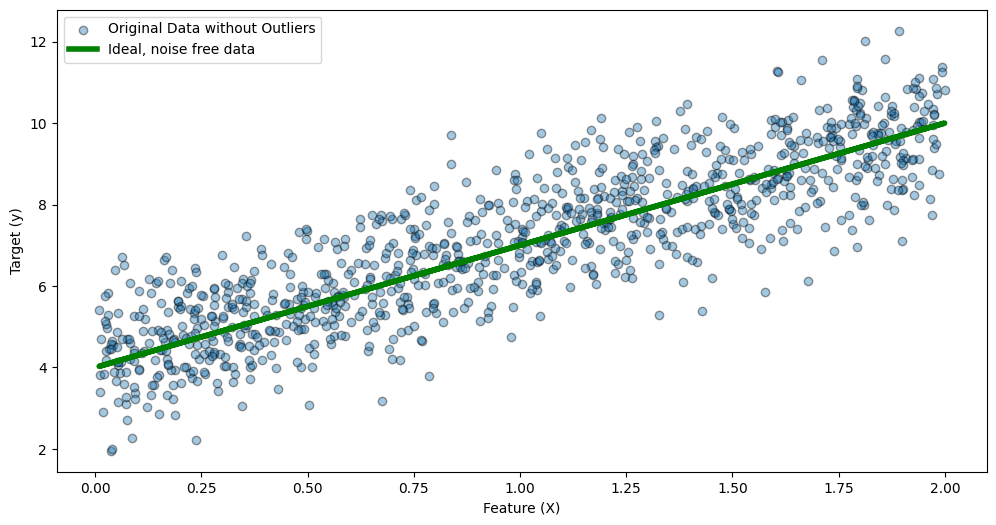

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data without Outliers')
plt.plot(X, y_ideal,  linewidth=4, color='g',label='Ideal, noise free data')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('')
plt.legend()
plt.show()


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y_outlier)
y_outlier_pred_lin = lin_reg.predict(X)

regression_results(y, y_outlier_pred_lin, "Ordinary")

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.6748
r2:  0.6357
MAE:  0.9468
MSE:  1.4164
RMSE:  1.1901



In [ ]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y_outlier)
y_outlier_pred_reg = ridge_reg.predict(X)

regression_results(y, y_outlier_pred_reg, "Ridge")

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.6766
r2:  0.6375
MAE:  0.9443
MSE:  1.4094
RMSE:  1.1872



In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y_outlier)
y_outlier_pred_las = lasso_reg.predict(X)

regression_results(y, y_outlier_pred_las, "Lasso")

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7146
r2:  0.6756
MAE:  0.8923
MSE:  1.2614
RMSE:  1.1231



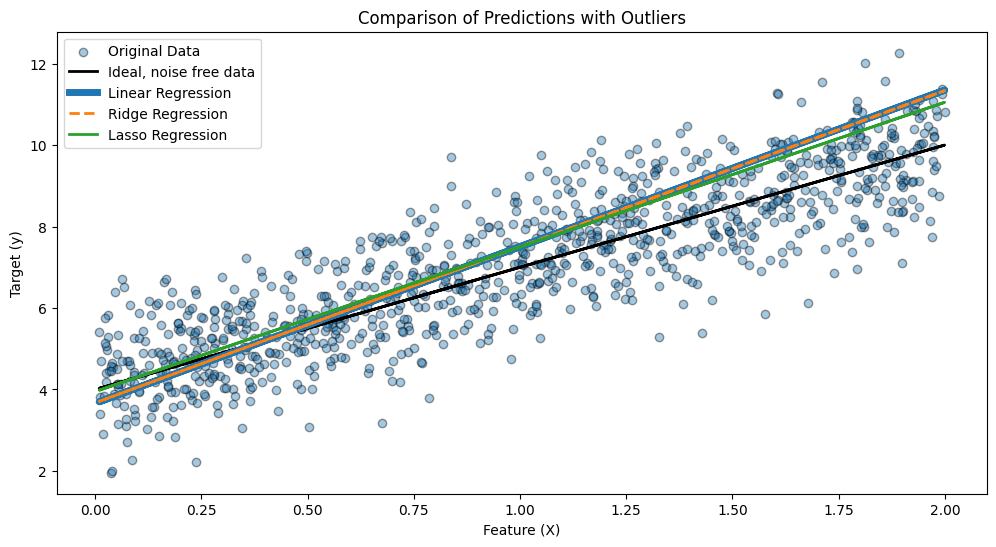

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot of the original data with outliers
plt.scatter(X, y, alpha=0.4,ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_outlier_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_outlier_pred_reg, linestyle='--', linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_outlier_pred_las,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Comparison of Predictions with Outliers')
plt.legend()
plt.show()

Evaluation metrics for Ordinary Linear Regression
explained_variance:  0.7492
r2:  0.7492
MAE:  0.7873
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for Ridge Linear Regression
explained_variance:  0.7492
r2:  0.7492
MAE:  0.7874
MSE:  0.975
RMSE:  0.9874

Evaluation metrics for Lasso Linear Regression
explained_variance:  0.7191
r2:  0.7191
MAE:  0.8408
MSE:  1.0923
RMSE:  1.0451



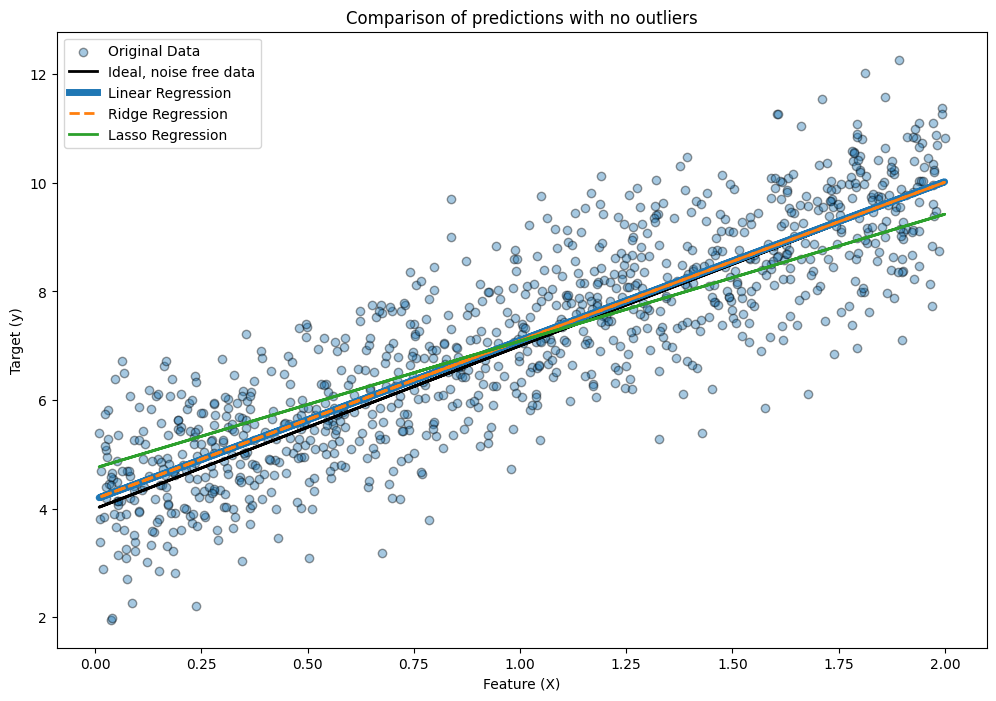

In [ ]:
# Fit a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Fit a ridge regression model (regularization to control large coefficients)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
y_pred_ridge = ridge_reg.predict(X)
# Fit a lasso regression model (regularization to control large coefficients)
lasso_reg = Lasso(alpha=0.2)
lasso_reg.fit(X, y)
y_pred_lasso = lasso_reg.predict(X)

# Print the regression results
regression_results(y, y_pred_lin, 'Ordinary')
regression_results(y, y_pred_ridge, 'Ridge')
regression_results(y, y_pred_lasso, 'Lasso')


# Plot the data and the predictions
plt.figure(figsize=(12, 8))

# # Scatter plot of the original data
plt.scatter(X, y, alpha=0.4, ec='k', label='Original Data')

# Plot the ideal regression line (noise free data)
plt.plot(X, y_ideal,  linewidth=2, color='k',label='Ideal, noise free data')

# Plot predictions from the simple linear regression model
plt.plot(X, y_pred_lin,  linewidth=5, label='Linear Regression')

# Plot predictions from the ridge regression model
plt.plot(X, y_pred_ridge, linestyle='--',linewidth=2, label='Ridge Regression')

# Plot predictions from the lasso regression model
plt.plot(X, y_pred_lasso,  linewidth=2, label='Lasso Regression')

plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')

plt.title('Comparison of predictions with no outliers')
plt.legend()
plt.show()

# Machine Learning Pipelines and GridSearchCV


## Objectives


- Build and evaluate a machine learning pipeline
- Implement GridSearchCV for hyperparameter tuning with crossvalidation
- Implement and optimize a complex classification pipeline using real-world data
- Extract feature importances from a trained pipeline


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
data = load_iris()
X, y = data.data, data.target
labels = data.target_names

In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2),),
    ('knn', KNeighborsClassifier(n_neighbors=5,))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
pipeline.fit(X_train, y_train)

test_score = pipeline.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.3f}")

Test Accuracy: 0.900


In [ ]:
y_pred = pipeline.predict(X_test)

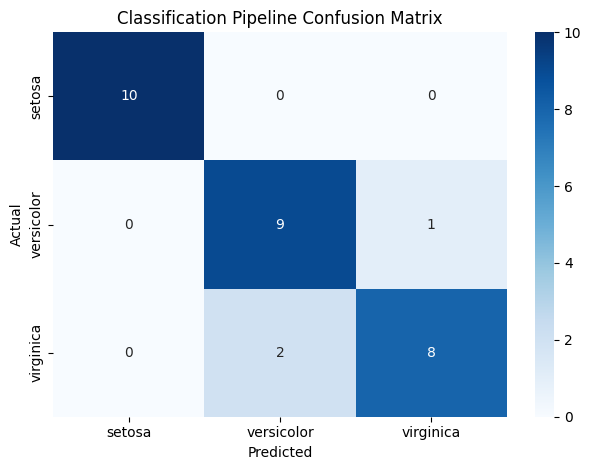

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
pipeline = Pipeline(
                    [('scaler', StandardScaler()),
                     ('pca', PCA()),
                     ('knn', KNeighborsClassifier())
                    ]
                   )

param_grid = {'pca__n_components': [2, 3],
              'knn__n_neighbors': [3, 5, 7]
             }

In [ ]:
#cross validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
best_model = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy',verbose = 2)
best_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=3, pca__n_components=3; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_components=2; total time=   0.0s
[CV] END ............knn__n_neighbors=5, pca__n_c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 3]},
             scoring='accuracy', verbose=2)

In [ ]:
test_score = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.3f}")

Test Accuracy: 0.933


In [ ]:
best_model.best_params_

{'knn__n_neighbors': 3, 'pca__n_components': 3}

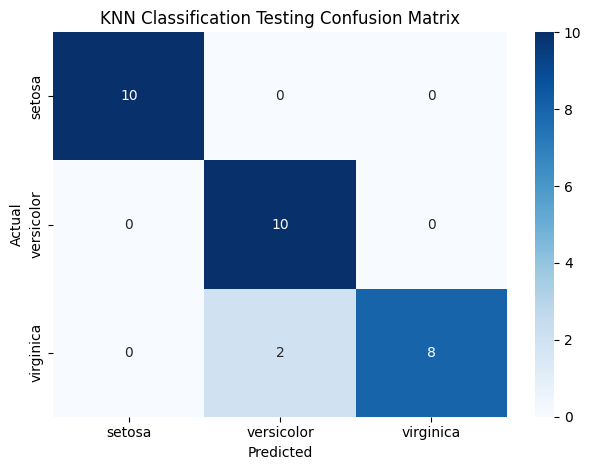

In [ ]:
y_pred = best_model.predict(X_test)

# Generate the confusion matrix for KNN
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a single plot for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('KNN Classification Testing Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()